# Introdução

Este notebook chama as funções do arquivo `codec.py` em sequência para realizar o processo de compressão e descompressão de uma imagem. Para executar todo o processo, basta rodar os blocos de código Python na ordem em que estão dispostos no notebook.

O notebook também exibe comparações visuais entre a imagem original e a imagem descomprimida, bem como os canais de crominância e luminância da imagem processada, permitindo uma análise das perdas de qualidade.


# Importação de Bibliotecas e Codec

No bloco seguinte, são importadas as bibliotecas necessárias, além do arquivo `codec.py`, que contém as implementações das funções de compressão e descompressão JPEG.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import codec

* Definindo as matrizes de quantização

In [18]:
QTY = np.array([[16, 11, 10, 16, 24, 40, 51, 61],  # Tabela de qunatização da luminancia
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]])

QTC = np.array([[17, 18, 24, 47, 99, 99, 99, 99],  # Tabela de quantização das chorminancias
                [18, 21, 26, 66, 99, 99, 99, 99],
                [24, 26, 56, 99, 99, 99, 99, 99],
                [47, 66, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99]])

# Execução do Processo de Compressão e Descompressão

No próximo bloco, as funções do codec são chamadas em sequência para realizar o processo completo de compressão e descompressão da imagem.


In [19]:
# abrindo a imagem, para mudar a imagem basta alterar o caminho da imagem
img = Image.open('imgs/lena.bmp')
# convertendo para o espaço de cor YCrCb
colorSpace = codec.toYCrCb(img)
# constantes de sub amostragem vertical e horizontal, não representão literalmente o 4:a:b
# quanto maior o valor mais informação descartada e pior o resultado final
# os valores equivalentes para 4:2:2 são ssv = 2, ssh = 1 e para 4:2:0 são ssv = 2 e ssh = 2
ssv, ssh = 3, 3
# fator de qualidade aplicado nas tabelas de quantização, quanto maior mais qualidade e quanto menor mais compressão
# recomendo usar valores de 1 ate no maximo 100 (em 100 praticamente ja não a perdas)
factor = 1
qty = np.round(QTY / factor)
qty[qty == 0] = 1
qtc = np.round(QTC / factor)
qtc[qtc == 0] = 1
# realizando operação de sub amostragem
y, crSub, cbSub, alpha = codec.subSampling(ssv,ssh,colorSpace)
print('comprimindo')
# comprimindo a imagem realizando diretamente a DCT, quantização e codificação em ZIG ZAG, retorna a string codificada
encoded = codec.compress(y, crSub, cbSub, alpha, qty, qtc, ssv, ssh)
codec.writeFile(encoded)
encoded = codec.readFile('compressed.gpeg')
print('descomprimindo')
# descomprimindo realizando os processos inversos da execução anterior 
y, cr, cb, alpha, ssv, ssh = codec.deCompress(encoded)
# reconstruindo os canais que foram aplicados sub amostragem
decodedYCrCb = codec.upSampling(y, cr, cb, alpha, ssv, ssh)
# voltando a imagem para o espaço de cor RGB com canal alpha
decoded = codec.toRGB(decodedYCrCb)
# convertendo o tipo dos dados na imagem para exibição
colorSpace = colorSpace.astype(np.uint8)
# salvando a imagem apenas para vizualização mais detalhada
Image.fromarray(decoded).save('compressed.png')

comprimindo
Tamanho em bits da imagem original: 8388608 bits
Tamanho do codigo da imagem apos compressão: 299038 bits
Taxa de compressão estimada: 96.44%
descomprimindo


# Visualização dos Resultados

No próximo bloco:
- À **esquerda**, é exibida a imagem gerada após a descompressão.
- À **direita**, é exibida a imagem original carregada a partir do arquivo BMP.

Logo abaixo, são mostrados os três canais da imagem descomprimida:
- **Luminância (Y)** 
- **Crominância Cr** 
- **Crominância Cb** 

Esses canais são apresentados antes da conversão de volta para o espaço de cor RGB, permitindo visualizar a perda de qualidade devido à compressão.


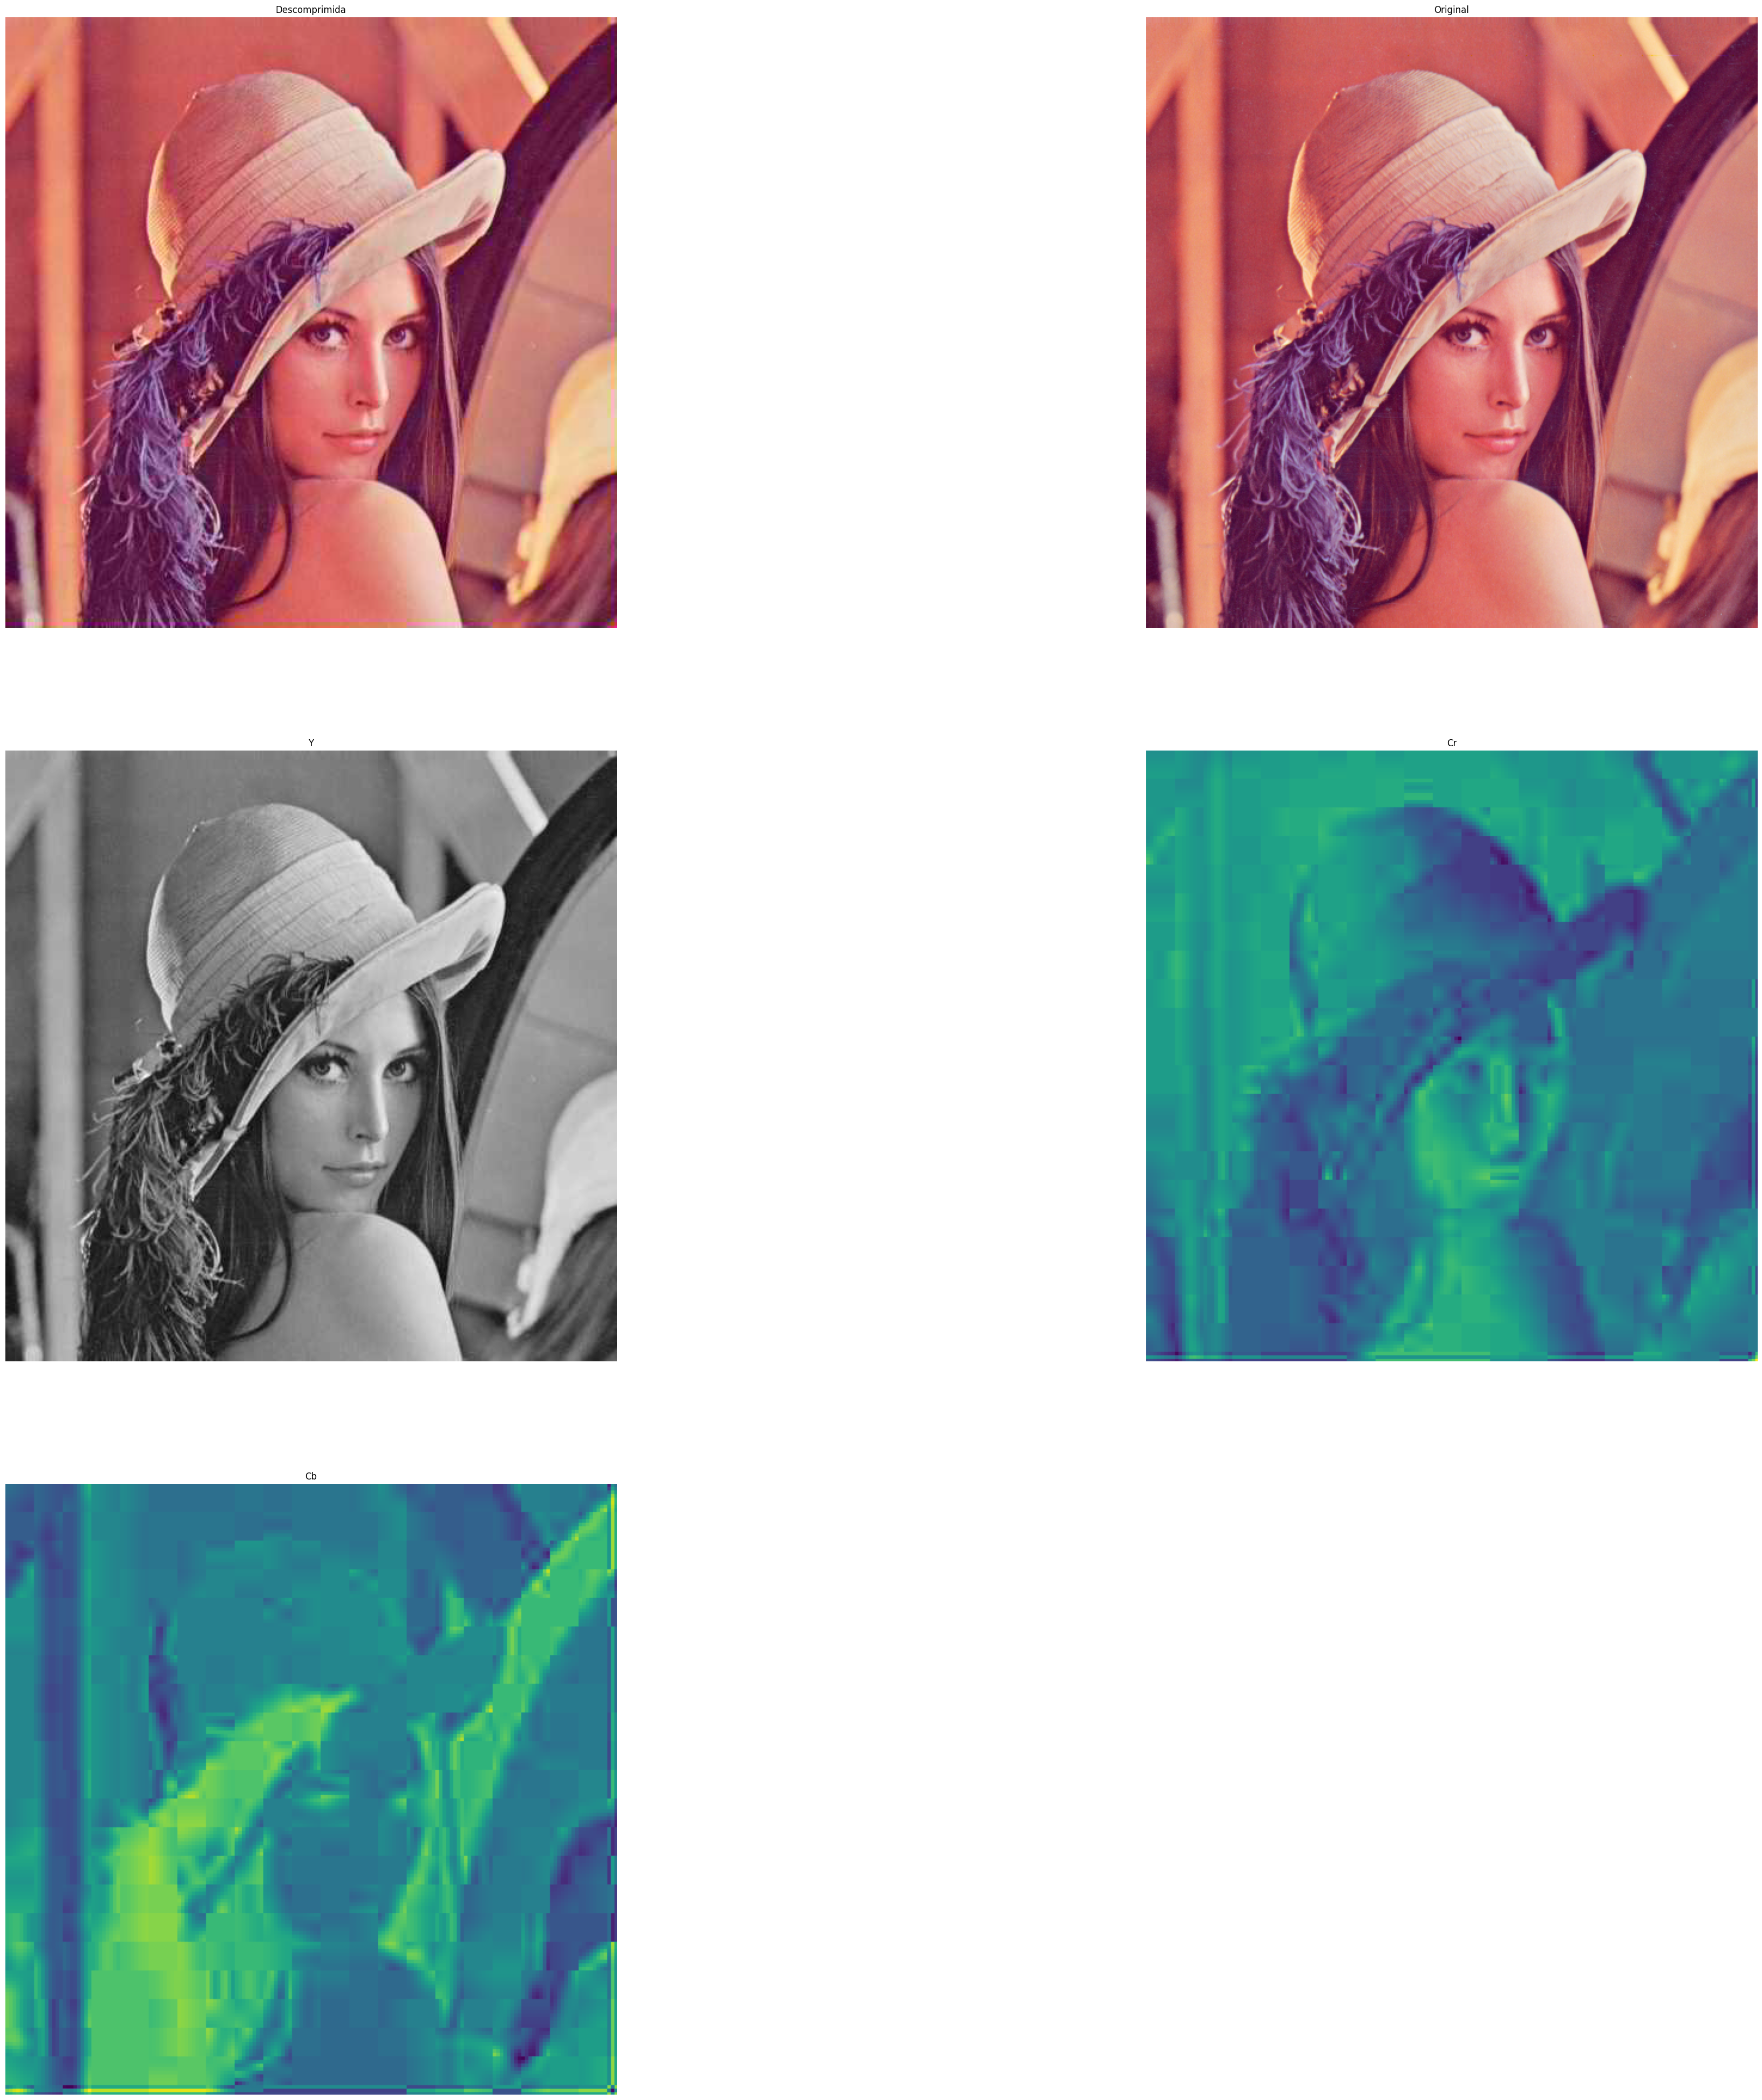

In [20]:
plt.figure(figsize=(50,50))

plt.subplot(3,2,1)
plt.title('Descomprimida')
plt.axis('off')
plt.imshow(decoded)

plt.subplot(3,2,2)
plt.title('Original')
plt.axis('off')
plt.imshow(img)

plt.subplot(3,2,3)
plt.title('Y')
plt.axis('off')
plt.imshow(decodedYCrCb[:,:,0], cmap='gray')

plt.subplot(3,2,4)
plt.title('Cr')
plt.axis('off')
plt.imshow(decodedYCrCb[:,:,1])

plt.subplot(3,2,5)
plt.title('Cb')
plt.axis('off')
plt.imshow(decodedYCrCb[:,:,2])